In [46]:
import jax
import jax.numpy as jnp
import numpy as np
import h5py
import matplotlib.pyplot as plt

import ase
import ase.visualize
from ase.visualize import view

from molnet.data.datasets import edafm
from molnet.data.utils import atom_map_generator, get_image_and_atom_map_np


In [47]:
valid_indices = edafm.get_valid_indices(
    '/l/data/small_fragments/afm.h5',
    np.array([1, 6, 7, 8, 9]),
)

100%|██████████| 40079/40079 [00:06<00:00, 6464.93it/s]


In [48]:

def generator():
    for i in range(100):

        split, index = valid_indices[i]
        x, atom_map, xyz, = get_image_and_atom_map_np(
            '/l/data/small_fragments/afm.h5',
            np.array([1, 6, 7, 8, 9]),
            index,
            split,
            2.0,
            0.125,
            0.2,
        )
        elements = np.unique(xyz[:, -1])
        if np.any(~np.isin(elements, [1, 6, 7, 8, 9])):
            continue
        if x is None:
            continue
        yield x, atom_map, xyz
        
gen = generator()

(128, 128, 10) (5, 128, 128, 21) (30, 5) unique elements [1. 6. 7. 8.]


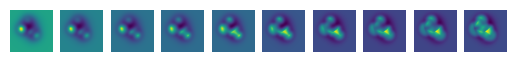

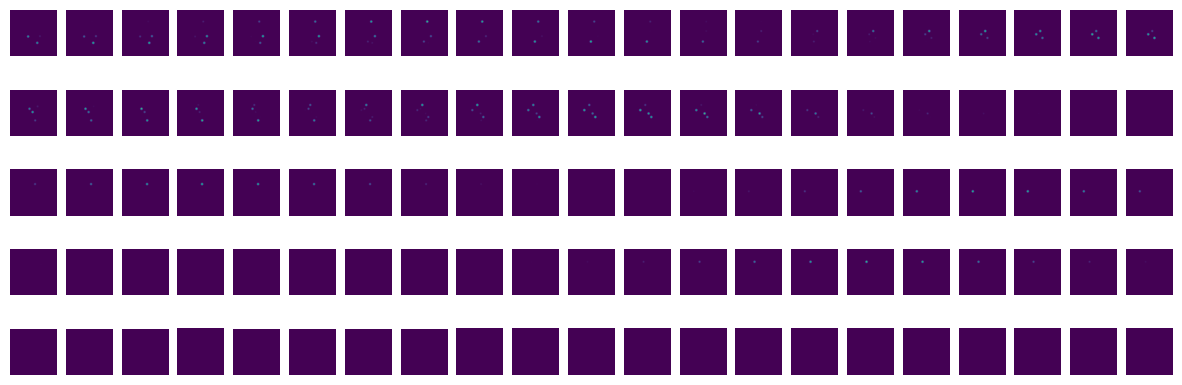

In [96]:
x, y, xyz = next(gen)
print(x.shape, y.shape, xyz.shape, "unique elements", np.unique(xyz[:, -1]))

# Plot input image
for i in range(x.shape[-1]):
    ax = plt.subplot(1, 10, i + 1)
    ax.imshow(x[..., i], origin='lower')
    ax.axis('off')
# Plot atom maps

fig = plt.figure(figsize=(15, 5))
for i in range(y.shape[0]):
    for j in range(y.shape[-1]):
        ax = plt.subplot(y.shape[0], y.shape[-1], i * y.shape[-1] + j + 1)
        ax.imshow(y[i, ..., j], origin='lower', vmin=0, vmax=1)
        ax.axis('off')

In [97]:
mol = ase.Atoms(positions=xyz[:, :3], numbers=xyz[:, -1])
view(mol)

<Popen: returncode: None args: ['/u/79/kurkil1/unix/.venvs/molnet/bin/python...>